In [5]:
import torch
import numpy as np
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from ptsne.ptsne import ParametricTSNE
from matplotlib import pyplot as plt

In [6]:
mnist = MNIST(
    './data',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

100.1%

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


113.5%

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw


100.4%

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw


180.4%C:\Users\Gini\anaconda3\envs\pli\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...
Done!


In [7]:
testdata = mnist.data.reshape(-1, 28*28) / 255.

Notes from testing:

- `hidden_layer_dims = [300,100]` works well
- learned `alpha` for perplexity of 100 is about 1.8
- learned `alpha` for perplexity of 50 is > 2

In [9]:
foo = ParametricTSNE(28*28, 2, 50, use_cuda=False, hidden_layer_dims=[300,100], alpha=2) # use_cuda=True, alpha=1

In [10]:
foo.fit(testdata[:20000], batch_size=1000, epochs=30, learning_rate=0.01, pretrain=True, verbose=True, loss_func='kl')

Calculating PCA
2020-09-25 09:11:26.707537: Beginning pretraining for 5 epochs
2020-09-25 09:11:27.767094: Loss after epoch 0: 79.2628014087677
2020-09-25 09:11:28.662800: Loss after epoch 1: 12.400022625923157
2020-09-25 09:11:29.512636: Loss after epoch 2: 2.864510551095009
2020-09-25 09:11:30.411236: Loss after epoch 3: 0.8129256889224052
2020-09-25 09:11:31.430708: Loss after epoch 4: 0.2971525816246867
2020-09-25 09:11:31.431709: Finished pretraining
Indexing
2020-09-25 09:12:45.110631: Beginning training for 30 epochs
2020-09-25 09:12:54.941780: Loss after epoch 1: 75.4138558099677
2020-09-25 09:13:04.348468: Loss after epoch 2: 67.66247724085392
2020-09-25 09:13:13.462735: Loss after epoch 3: 64.20470463425795
2020-09-25 09:13:22.280032: Loss after epoch 4: 61.32348543033597
2020-09-25 09:13:31.225552: Loss after epoch 5: 60.2924049225951
2020-09-25 09:13:39.914171: Loss after epoch 6: 59.43486167195072
2020-09-25 09:13:48.684613: Loss after epoch 7: 57.96362655177263
2020-09-25

In [11]:
p_precalc = foo.p_ij

In [15]:
# bar = foo(testdata[:20000].cuda()).cpu().detach().numpy()
bar = foo(testdata[:20000]).cpu().detach().numpy()

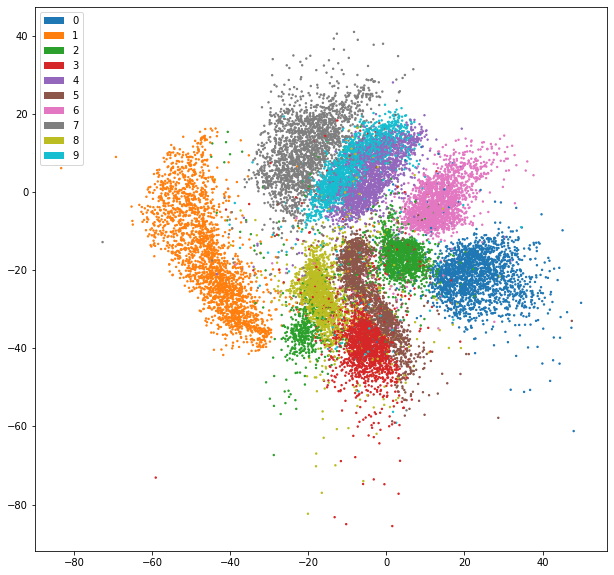

In [17]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
colors = [plt.cm.tab10.colors[i] for i in mnist.targets[:20000]]
ax.scatter(bar[:,0],bar[:,1],c=colors, s=2)
ax.set_aspect(1)
recs = []
for i in range(0,10):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=plt.cm.tab10.colors[i]))
ax.legend(recs,list(range(10)),loc=2)